# Homework 1 - Linear Regression

## Dataset
The dataset you will be using is about Life expectancy of different countries. We will explore how immunization factors, mortality factors, economic factors, social factors and other health related factors affect Life expectancy of a country.

There are two data files: "LifeExpectancy_training.csv" and "LifeExpectancy_test.csv"<br/>
Both files have the following fields, except Life_expectancy which is not available in "LifeExpectancy_test.csv"

Features :
- Year : from 2000 to 2015
- Status : Developed or Developing status
- Adult_Mortality : Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
- Alcohol : Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
- percentage_expenditure : Expenditure on health as a percentage of Gross Domestic Product per capita(%)
- BMI: Average Body Mass Index of entire population
- Total_expenditure: General government expenditure on health as a percentage of total government expenditure (%)
- Diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
- HIV_AIDS: Deaths per 1000 live births HIV/AIDS (0-4 years)
- GDP: Gross Domestic Product per capita (in USD)
- Population
- Income_composition_of_resources: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
- Schooling: Number of years of Schooling(years)

Target:
- Life_expectancy: Life Expectancy in age


Training dataset, "LifeExpectancy_training.csv", contains 1154 rows and 14 columns. This is the training set containing both of the features and the target.<br/>
Test dataset, "LifeExpectancy_test.csv", contains 495 rows and 13 columns. This is the test set which only contains the features.<br/>

Your goal is to predict Life expectancy based on the features.

In [ ]:
import numpy as np
import pandas as pd

Load the training data "LifeExpectancy_training.csv" in Colab and View the first 5 lines

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving LifeExpectancy_test.csv to LifeExpectancy_test.csv


In [ ]:
# Load the training data
import io
df = pd.read_csv(io.BytesIO(uploaded['LifeExpectancy_training.csv']))

In [ ]:
# Show the first 5 lines
### WRITE CODE ###
df.head()

,Year,Status,Adult_Mortality,Alcohol,percentage_expenditure,BMI,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,Schooling,Life_expectancy
0,2011,Developing,93,1.57,835.062683,64.0,7.12,81,0.1,8734.96530,4588368.0,0.758,13.2,75.0
1,2014,Developing,152,6.41,789.077295,32.4,4.12,99,0.1,5941.84710,68416772.0,0.737,13.6,74.6
2,2013,Developed,68,11.82,90.585012,56.6,11.14,95,0.1,554.71532,8479375.0,0.887,15.7,81.1
3,2014,Developed,135,0.01,1.576409,59.9,5.57,94,0.1,12.27733,1998979.0,0.797,14.7,74.8
4,2002,Developing,192,5.93,27.638103,2.2,3.70,96,0.7,296.54617,6473164.0,0.657,11.5,71.4


## Data Exploration
We can plot a histogram of the dataframe for the features except "Status" to understand their distributions. <br/>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f89d3ce9590>,
      dtype=object)

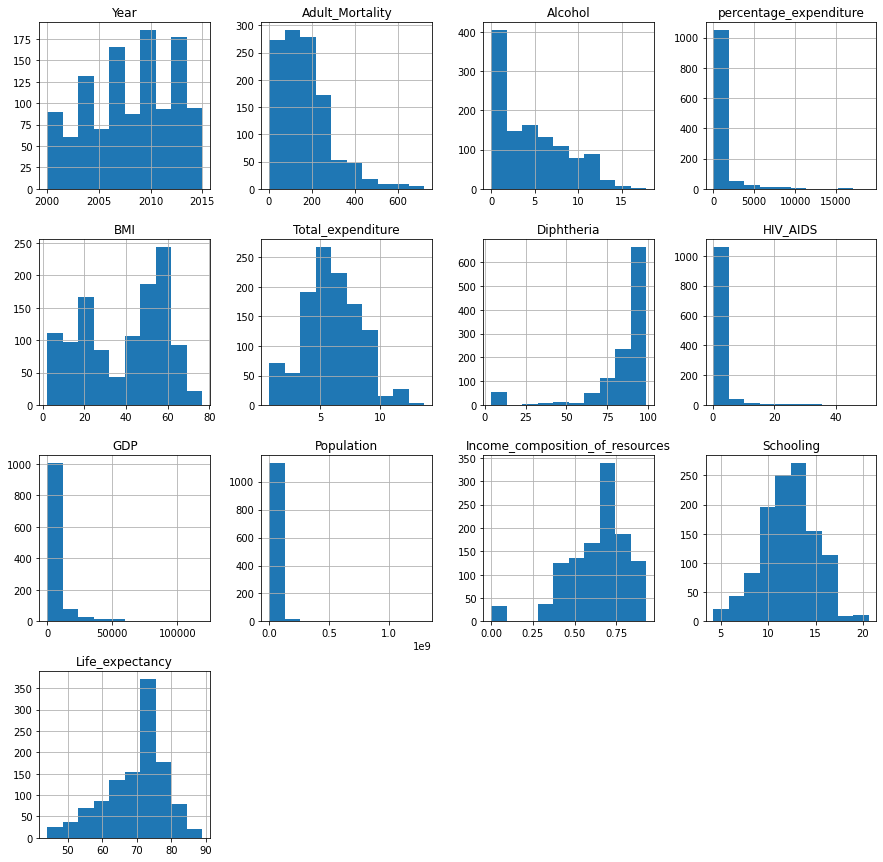

In [ ]:
### WRITE CODE TO OBTAIN AND DISPLAY HISTOGRAMS ###
%matplotlib inline
df.hist(figsize = (15,15))

##### Q1. What can you infer from the histograms? <br/>
Ans- We can see relatively skewed distributions across the board with values indicating "healthy" populations, based on context. Nevertheless, we have a wide range of values for each of the data features, meaning we have a mix of "good" and "bad" countries in the data.

From the graph Life_expectancy, minimum Life expectancy is about 43, and maximum Life expectancy is about 88.



Compute the correlation matrix to get an understanding of the correlation between life_expectancy and the other features.<br/>

##### Answer the following questions:<br/>

##### Q2. Why is the diagonal made up of 1's in the correlation matrix?<br/>
Ans- Because they are the correlation of a column with itself. 

##### Q3. Why is the matrix symmetric along diagonal?<br/>
Ans- Because the correlation of column i with column j is the same as the correlation of column j with column i. We are looking at the correlation coefficients between all combinations of two variables, and since the correlation of A and B is equal to the correlation of B and A, we end up double-counting (thus, the matrix symmetry).

##### Q4. Looking at the correlation matrix, if you have to choose one predictor for a simple linear regression model with Life_expectancy as the outcome, which one would you choose and why? <br/>
Ans- We would choose Schooling, as this has the highest correlation with Life_expectancy (0.746667). The higher the absolute value of correlation, the stronger the linear relationship between the two variables. 



In [ ]:
### WRITE CODE TO OBTAIN CORRELATION MATRIX ###
df.corr()

,Year,Adult_Mortality,Alcohol,percentage_expenditure,BMI,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,Schooling,Life_expectancy
Year,1.000000,-0.036037,-0.106052,0.071849,0.026868,0.061813,0.035956,-0.117035,0.102474,0.036443,0.106174,0.097546,0.043819
Adult_Mortality,-0.036037,1.000000,-0.223558,-0.245146,-0.373558,-0.135219,-0.218970,0.522985,-0.266263,-0.009659,-0.479667,-0.459109,-0.703466
Alcohol,-0.106052,-0.223558,1.000000,0.424267,0.345296,0.224153,0.245480,-0.053519,0.446676,-0.014811,0.573437,0.609049,0.437203
percentage_expenditure,0.071849,-0.245146,0.424267,1.000000,0.220621,0.184878,0.138710,-0.100698,0.957695,-0.014819,0.403653,0.417577,0.408438
BMI,0.026868,-0.373558,0.345296,0.220621,1.000000,0.188025,0.190955,-0.232770,0.238966,-0.061945,0.520061,0.549841,0.549065
Total_expenditure,0.061813,-0.135219,0.224153,0.184878,0.188025,1.000000,0.154105,0.015136,0.184139,-0.068187,0.183759,0.246624,0.199058
Diphtheria,0.035956,-0.218970,0.245480,0.138710,0.190955,0.154105,1.000000,-0.152190,0.161987,-0.016045,0.340664,0.357381,0.357720
HIV_AIDS,-0.117035,0.522985,-0.053519,-0.100698,-0.232770,0.015136,-0.152190,1.000000,-0.115119,-0.025374,-0.265902,-0.233620,-0.586847
GDP,0.102474,-0.266263,0.446676,0.957695,0.238966,0.184139,0.161987,-0.115119,1.000000,-0.015751,0.448989,0.462840,0.440497
Population,0.036443,-0.009659,-0.014811,-0.014819,-0.061945,-0.068187,-0.016045,-0.025374,-0.015751,1.000000,0.005623,-0.016738,-0.011133


In [ ]:
### Correlation between life_expectancy and the other features
df.corr()['Life_expectancy']

Year                               0.043819
Adult_Mortality                   -0.703466
Alcohol                            0.437203
percentage_expenditure             0.408438
BMI                                0.549065
Total_expenditure                  0.199058
Diphtheria                         0.357720
HIV_AIDS                          -0.586847
GDP                                0.440497
Population                        -0.011133
Income_composition_of_resources    0.741092
Schooling                          0.746667
Life_expectancy                    1.000000
Name: Life_expectancy, dtype: float64

### Standardization of features

Feature standardization makes the values of each feature in the data have zero-mean and unit-variance. This method is widely used for normalization in many machine learning algorithms. The general method of calculation is to determine the distribution mean and standard deviation for each feature. Next we subtract the mean from each feature. Then we divide the values of each feature by its standard deviation.

$x'$ = ($x$ - $\bar{x}$)/$\sigma$ 

where $x$ is the original feature vector,
$\bar{x}$ is the mean of the feature vector and
$\sigma$ is its standard deviation.

This is also called Z-score Normalization. 

Perform Z-score Normalization on the features (except "Year" and "Status") in both training and test set. 

In [ ]:
# Load the test set "LifeExpectancy_test.csv"
### WRITE CODE ###
X_test = pd.read_csv(io.BytesIO(uploaded['LifeExpectancy_test.csv']))

In [ ]:
from sklearn.preprocessing import StandardScaler
### WRITE CODE TO PERFORM Z-score Normalization ###
# create a scaler object
scaler = StandardScaler()
scaler
# training set 
num_colnames = np.array(df.drop(['Year','Status'],axis=1).columns)
df_train_num = pd.DataFrame(scaler.fit_transform(df.drop(['Year','Status'],axis=1)), columns = num_colnames)
df_train_num.head()

,Adult_Mortality,Alcohol,percentage_expenditure,BMI,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,Schooling,Life_expectancy
0,-0.596230,-0.746122,0.058789,1.260316,0.455246,-0.172026,-0.304462,0.244064,-0.140504,0.668903,0.361049,0.614578
1,-0.111399,0.462190,0.033498,-0.333480,-0.836894,0.686328,-0.304462,0.011425,0.961461,0.553909,0.505181,0.568967
2,-0.801666,1.812804,-0.350645,0.887085,2.186713,0.495582,-0.304462,-0.437269,-0.073327,1.375298,1.261876,1.310140
3,-0.251096,-1.135578,-0.399597,1.053526,-0.212360,0.447896,-0.304462,-0.482448,-0.185208,0.882465,0.901545,0.591772
4,0.217300,0.342358,-0.385264,-1.856665,-1.017793,0.543269,-0.198197,-0.458771,-0.107964,0.115834,-0.251513,0.204082


In [ ]:
# Split out Xs from the training set
X_train_num = df_train_num.drop(['Life_expectancy'],axis=1)

In [ ]:
# testing set
num_colnames = np.array(X_test.drop(['Year','Status'],axis=1).columns)
X_test_num = pd.DataFrame(scaler.fit_transform(X_test.drop(['Year','Status'],axis=1)), columns = num_colnames)
X_test_num

,Adult_Mortality,Alcohol,percentage_expenditure,BMI,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,Schooling
0,0.756055,-1.094334,-0.387676,-0.972240,0.972884,-0.659990,-0.332187,-0.489852,-0.173547,-0.912468,-0.861195
1,0.846254,-1.089430,-0.376007,-1.049526,1.179708,-0.834810,-0.332187,-0.459168,-0.176222,-1.026841,-1.143812
2,-0.649533,0.219699,-0.120471,0.980536,0.001708,0.694866,-0.332187,-0.056699,-0.202352,0.634297,0.481233
3,-1.198239,0.168216,-0.375312,0.712609,0.186051,0.651161,-0.332187,-0.468499,-0.202177,0.345640,-0.401943
4,-1.175690,-0.045069,-0.382939,0.609560,0.253494,0.607455,-0.332187,-0.477359,-0.201876,0.285730,-0.437270
...,...,...,...,...,...,...,...,...,...,...,...
490,2.642701,-0.545186,-0.390931,-0.889801,0.181555,-0.091825,1.981906,-0.494842,-0.072592,-0.776309,-0.366616
491,2.650218,0.180474,-0.358958,-0.343642,-0.151163,0.257815,1.952614,-0.425468,-0.189566,-1.010502,-0.684560
492,3.439452,-0.224032,-0.379133,-0.384861,-0.335506,-0.354055,2.655629,-0.463890,-0.059979,-1.092197,-0.790541
493,4.078356,-0.081842,-0.386669,-0.441538,0.329929,-0.659990,4.090953,-0.452096,-0.204132,-1.173893,-0.931849


##### Q5. What are the advantages and disadvantages of using Z-score Normalization?<br/>
Ans- Advantages using Z Score are that it can be used to compare raw scores taken from different tests, and Z score takes into account both the mean value and the variability in a set of raw scores.
The disadvantages of Z score are that it always assumes a normal distribution. However, many variables in our dataset have a skewed distribution, which violates the assumption.

##### Q6. In this dataset, do you need to use the Z-score Normalization? Explain.<br/>
Ans- Z score takes into account both the mean value and the variability in a set of raw scores. Z-score normalization is useful here, because our data has varying scales/ranges/units, and we have no idea about the distribution of the data. Standardization improves the data quality and makes it easier to compare a value with respect to a mean/average.

### One-Hot Encoding

"Year" and "Status" can only take discrete values. We need to perform one-hot encoding on discrete values for it to be processed in the model. One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.
Perform one-hot encoding on "Year" and "Status" and print the shape of your encoded array

In [ ]:
from sklearn.preprocessing import OneHotEncoder
### WRITE CODE TO PERFORM ONE-HOT CODING ON "Year" AND "Status" ###
enc = OneHotEncoder(handle_unknown='ignore')

# training set
X_train = df.drop(['Life_expectancy'],axis=1)
X_train_cat = X_train[['Year','Status']]
enc.fit(X_train_cat)
enc.categories_
X_train_cat = enc.transform(X_train_cat).toarray()
cat_colnames = enc.get_feature_names_out(['Year','Status'])
X_train_cat =  pd.DataFrame(X_train_cat, columns = cat_colnames)
X_train_cat

,Year_2000,Year_2001,Year_2002,Year_2003,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Status_Developed,Status_Developing
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1150,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Print the shape of your encoded X
X_train_final = pd.concat([X_train_num, X_train_cat], axis=1)
X_train_final.shape

(1154, 29)

In [ ]:
# testing set
X_test_cat = X_test[['Year','Status']]
enc.fit(X_test_cat)
enc.categories_
X_test_cat = enc.transform(X_test_cat).toarray()
cat_colnames = enc.get_feature_names_out(['Year','Status'])
X_test_cat =  pd.DataFrame(X_test_cat, columns = cat_colnames)
X_test_cat
# Print the shape of your encoded X
X_test_final = pd.concat([X_test_num, X_test_cat], axis=1)
X_test_final.shape

(495, 28)

In [ ]:
# Year_2015 is missing (raised an error when predicting model)
# drop from X_train_final
# X_train_final = X_train_final.drop(['Year_2015'],axis=1)
# X_train_final.shape

Q7. What are the advantages and disadvantages of using One-hot encoding?

Ans- The good thing about one-hot encoding is it allows us to use previously categorical features as a numerical value for input in our models. It is also advantageous that the result is nominal rather than ordinal. On the other hand, one-hot encoding generates several new variables, it might cause the problem of having too many predictors if original column has a large number of unique values. Another disadvantage is that it produces multicollinearity among the various variables, lowering the model's accuracy.

## Multiple Linear Regression

In the big data era, it is highly unlikely that we are interested in the effect of a single variable on another. To simultaneously account for the effects of multiple variables, we use multiple regression (which accounts for the covariances between predictors).

While the algorithmic solution to multiple regression exists, it is easier to conceptualize in terms of linear algebra. The optimal $\hat{\beta}$ vector that minimizes the residual sum of squares is:

$\hat{\beta} = (X^TX)^{-1}X^Ty $


Perform multiple linear regression on the training dataset, where the outcome is "Life_expectancy".

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
### Bulding and fitting the Multiple Linear Regression model###
LR = LinearRegression()
Y_train = df_train_num['Life_expectancy']
model = LR.fit(X_train_final, Y_train)

In [ ]:
r_sq = model.score(X_train_final, Y_train)
r_sq

0.83142413446943

In [ ]:
### Evaluate the Linear Regression model by computing MSE on the training set###
from sklearn.metrics import mean_squared_error
# Training set mse??? mean_squared_error(y_true, y_pred)
Y_train = df_train_num['Life_expectancy']
Y_train_pred = model.predict(X_train_final)
mean_squared_error(Y_train, Y_train_pred)

0.16857586553057013

Q8. Print the value of coefficients and also the corresponding variable names for the coefficients.

In [ ]:
model_coef = pd.DataFrame(model.coef_.reshape(-1, len(model.coef_)),columns=X_train_final.columns)
model_coef

,Adult_Mortality,Alcohol,percentage_expenditure,BMI,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Income_composition_of_resources,...,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Status_Developed,Status_Developing
0,-0.234439,-0.055873,0.062989,0.082754,0.025993,0.05206,-0.304099,0.0264,-0.006278,0.232962,...,-0.027385,-0.061592,-0.078216,-0.105638,-0.096448,-0.106458,-0.112358,0.119412,0.032117,-0.032117


Q9. Is there a problem of multicolinearity? Explain what you can do

Ans- When we first computed a correlation matrix of our features, we found that two explanatory variables had a correlation coefficient greater than 0.8: GDP and percentage_expenditure. To do a more robust check, we computed VIF values and found that only those two variables (GDP and percentage_expenditure) had VIFs greater than 10. We can conclude that GDP and percentage_expenditure are highly correlated with each other and are therefore redundant in the overall multiple regression. Because of the very high correlation between those two variables, a variable transformation doesn’t seem like it would fix the problem. Instead, we could either drop both variables or drop just one of those variables (by dropping only one, we get to keep the other variable while losing the source of the multicollinearity between the original two).

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_train_num.drop(['Life_expectancy'],axis=1).columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_train_num.drop(['Life_expectancy'],axis=1).values, i)
                          for i in range(len(df_train_num.drop(['Life_expectancy'],axis=1).columns))]
  
print(vif_data)

                            feature        VIF
0                   Adult_Mortality   1.738034
1                           Alcohol   1.788182
2            percentage_expenditure  12.298722
3                               BMI   1.526698
4                 Total_expenditure   1.110999
5                        Diphtheria   1.174935
6                          HIV_AIDS   1.414560
7                               GDP  12.955977
8                        Population   1.011218
9   Income_composition_of_resources   3.141815
10                        Schooling   3.455175


In [ ]:
# VIF dataframe after removing GDP from Xs
vif_data = pd.DataFrame()
vif_data["feature"] = df_train_num.drop(['Life_expectancy','GDP'],axis=1).columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_train_num.drop(['Life_expectancy','GDP'],axis=1).values, i)
                          for i in range(len(df_train_num.drop(['Life_expectancy','GDP'],axis=1).columns))]
  
print(vif_data)

                           feature       VIF
0                  Adult_Mortality  1.737990
1                          Alcohol  1.787208
2           percentage_expenditure  1.311356
3                              BMI  1.523533
4                Total_expenditure  1.110620
5                       Diphtheria  1.174691
6                         HIV_AIDS  1.414508
7                       Population  1.011121
8  Income_composition_of_resources  3.120653
9                        Schooling  3.425581


In [ ]:
# Drop GDP from Xs in the training set 
X_train_final = X_train_final.drop(['GDP'],axis=1)
X_train_final.columns

Index(['Adult_Mortality', 'Alcohol', 'percentage_expenditure', 'BMI',
       'Total_expenditure', 'Diphtheria', 'HIV_AIDS', 'Population',
       'Income_composition_of_resources', 'Schooling', 'Year_2000',
       'Year_2001', 'Year_2002', 'Year_2003', 'Year_2004', 'Year_2005',
       'Year_2006', 'Year_2007', 'Year_2008', 'Year_2009', 'Year_2010',
       'Year_2011', 'Year_2012', 'Year_2013', 'Year_2014', 'Year_2015',
       'Status_Developed', 'Status_Developing'],
      dtype='object')

### Goodness of fit

A model can always make predictions. But it is important to determine how good the model is.
How do we know that our model captures the data well? When evaluating model fit, a good metric is $R^2$, which corresponds to the amount of variance explained by the model. The formula for $R^2$ is the following:

$R^2$ = $1 - \dfrac{RSS}{TSS}$<br/>
where:<br/>
$RSS = \Sigma(y - \hat{y})^2$<br/>
$TSS = \Sigma(y - \bar{y})^2$<br/>

$R^2$ is also one metric for comparing models against each other. It is intuitive to say that the model that explains more variation in the data is a better fit than one that explains less variation. 

Fill in the code for calculation of R2 score 

In [ ]:
from sklearn.metrics import r2_score

$R^2$ for model with "Schooling" as predictor and "Life_expectancy" as outcome

In [ ]:
### WRITE CODE ###
X_train_SLR = np.array(X_train_final['Schooling']).reshape(-1,1)
Y_train_SLR = np.array(df_train_num['Life_expectancy']).reshape(-1,1)
SLRmodel = LinearRegression().fit(X_train_SLR, Y_train_SLR)
# Print R2 score
SLR_r_sq = SLRmodel.score(X_train_SLR, Y_train_SLR)
SLR_r_sq

0.5575121346397233

$R^2$ for model with "Schooling", "Adult_Mortality" as predictor and "Life_expectancy" as outcome

In [ ]:
### WRITE CODE ###
X_train_MLR2 = X_train_final[['Schooling','Adult_Mortality']]
Y_train_MLR2 = df_train_num['Life_expectancy']
MLRmodel2 = LinearRegression().fit(X_train_MLR2, Y_train_MLR2)
# Print R2 score
MLR2_r_sq = MLRmodel2.score(X_train_MLR2, Y_train_MLR2)
MLR2_r_sq

0.7223314341007621

$R^2$ for model with "Schooling","Adult_Mortality" and "Population" as predictor and "Life_expectancy" as outcome

In [ ]:
### WRITE CODE ###
X_train_MLR3 = X_train_final[['Schooling','Adult_Mortality','Population']]
Y_train_MLR3 = df_train_num['Life_expectancy']
MLRmodel3 = LinearRegression().fit(X_train_MLR3, Y_train_MLR3)
# Print R2 score
MLR3_r_sq = MLRmodel3.score(X_train_MLR3, Y_train_MLR3)
MLR3_r_sq

0.7223745101723087

You can see $R^2$ is always going up as we keep adding features.

This is one drawback of only using $R^2$ to evaluate your model. Adding predictors seems to always improve the predictive ability of your model, though it may not be true.

That is to say, we are not necessarily interested in making a perfect prediciton of our training data. If we were, we would always use all of the predictors available. Rather, we would like to make a perfect prediction of our test data. In this case, adding all the predictors may not be a good idea due to the trade-off between bias and variance. Thus, we are interested in the most predictive features, in the hopes that we can create a simpler model that performs well in the future.

This is why we consider another metric, Adjusted R2.
The adjusted R-squared increases only if the new term improves the model more than would be expected by chance.


$AdjustedR^2$ = $1 - \dfrac{(1-R^2)(n-1)}{(n-k-1)}$<br/>
where:<br/>
n = number of samples<br/>
k = number of features

Fill in the code for calculation of adjusted R2 score

Adjusted $R^2$ for model with "Schooling" as predictor and "Life_expectancy" as outcome

In [ ]:
### WRITE CODE ###

# Print Adjusted R2 score
1 - (1-SLRmodel.score(X_train_SLR, Y_train_SLR))*(len(Y_train_SLR)-1)/(len(Y_train_SLR)-X_train_SLR.shape[1]-1)

0.5571280305899313

Adjusted $R^2$ for model with "Schooling", "Adult_Mortality" as predictor and "Life_expectancy" as outcome.

In [ ]:
### WRITE CODE ###

# Print Adjusted R2 score
1 - (1-MLRmodel2.score(X_train_MLR2, Y_train_MLR2))*(len(Y_train_MLR2)-1)/(len(Y_train_MLR2)-X_train_MLR2.shape[1]-1)

0.7218489517968537

Adjusted $R^2$ for model with "Schooling","Adult_Mortality" and "Population" as predictor and "Life_expectancy" as outcome

In [ ]:
### WRITE CODE ###

# Print Adjusted R2 score
1 - (1-MLRmodel3.score(X_train_MLR3, Y_train_MLR3))*(len(Y_train_MLR3)-1)/(len(Y_train_MLR3)-X_train_MLR3.shape[1]-1)

0.7216502697640625

### K-fold Cross-Validation

However, adjusted $R^2$ is not enough to help us ahieve the best model, a more robust method is k-fold cross-validation.

* Randomly split dataset into K equal-sized subsets, or folds
* Treat each fold as validation set (train on all but K'th fold and test on K'th fold only)

* The overall error is then the mean error over all K models.
* Most common are 5- or 10-fold cross-validation

Please implement a 5-fold cross-validation by yourselves to find the best model in terms of Mean Square Error(MSE)

**Do not use sklearn.model_selection.cross_val_score or other built-in cross-validaiton functions**

In [ ]:
# MLR model after standardization, one hot encoding and multicollinearity variable removal
X_train_cleaned = X_train_final
Y_train_cleaned = df_train_num['Life_expectancy']
X_train_cleaned.shape
#MLRmodel_cleaned = LinearRegression().fit(X_train_cleaned, Y_train_cleaned)

(1154, 28)

In [ ]:
# Design a function to implement 5-fold cross-validation. 
# The input: training features X, training target y and # of folds f=5.
# The output: the average of MSE over the 5 folds.
import itertools
np.random.seed(401) #set a random seed to keep the random fold generation consistent for our evaluation purposes
def cross_val_mse(X, y, f):
    ### Write your code here ###
    train = pd.concat([X,y],axis=1) #combine the X and y input dataframes into the overall training set
    train = train.reindex(np.random.permutation(train.index)) #random shuffle of rows
    train.reset_index(drop=True, inplace=True) #reset index to complete the randomized shuffling

    folds = np.array_split(train,f) #split the dataframe into f equal parts

    fold_indices = ([index for index in range(0,f)]) #generate an index for each of the f folds
    fold_subsets = []
    test_subset = []

    #generate all possible combinations of f-1 indices: all permutations of fold index values minus 1 to be kept out (validation set)
    #for example, if we have five folds, this will return all combinations of four folds that will eventually make up the training set
    for index in range(len(fold_indices)+1):
      for subset in itertools.combinations(fold_indices, index):
        if len(subset) == (f-1):
          fold_subsets.append(subset)
          test_subset.append(np.setdiff1d(fold_indices,subset)[0])

    folds_list = list(zip(fold_subsets, test_subset)) #list of our k-folds -> each subset consists of the training folds and the validation fold

    MSE_list = []

    for i, j in folds_list: #for each of our subsets
      train_X = pd.DataFrame()
      train_y = pd.DataFrame()
      for index in i:
        train_X_addendum = folds[index].drop(['Life_expectancy'],axis=1) #for the index values that are in the subset, we'll grab the appropriate data subset
        train_X = pd.concat([train_X, train_X_addendum])
        train_y = pd.concat([train_y, folds[index]['Life_expectancy']]) #for the index values that are in the subset, grab appropriate data subset

      test_X = folds[j].drop(['Life_expectancy'],axis=1) #grab just the training features
      test_Y = folds[j]['Life_expectancy'] #grab just the y variable
      
      mlr = LinearRegression().fit(train_X, train_y) #for this subset, generate a multiple linear regression and fit on train X and y
      y_pred = mlr.predict(test_X) #generate predictions for y
      
      MSE_list.append(mean_squared_error(test_Y, y_pred)) #calculate MSE for this subset and append to our list of MSE values
      
    return np.mean(MSE_list) #given a list of MSE values for each of the instances in our cross-fold validation, calculate the average MSE

In [ ]:
print(cross_val_mse(X_train_cleaned, Y_train_cleaned, 5) )

0.17925526119139518


In [ ]:
# By using your above functions, find the best combination of features, which has the lowest averaged MSE 
# import itertools
from itertools import combinations 
### Write code here ###
X_train_cleaned_new =  X_train_cleaned[X_train_cleaned.columns.drop(list(X_train_cleaned.filter(regex = 'Year')))] #drop year since the encoded features introduce high dimensionality

#generate all combinations of features in our X_train_cleaned_new
#we only kept combinations of features that involved more than five features in order to have a somewhat more robust regression, although this value was arbitrary
combination = []
for index in range(len(X_train_cleaned_new.columns)+1):
  for subset in itertools.combinations(X_train_cleaned_new.columns, index):
    if len(subset) > 5:
      #print(list(subset))
      # print(cross_val_mse(X_train_cleaned[list(subset)], Y_train_cleaned[list(subset)], 5))
      combination.append(list(subset))

min = 1 #set a min MSE to beat
best_combo = []
#for each combination, calculate the cross-validated MSE and compare to the min
#we want to look for the lowest MSE value out of all the combinations of variables in our dataset
for c in combination:
  candidate = [cross_val_mse(X_train_cleaned[c], Y_train_cleaned, 5), c]
  if candidate[0] < min:
    min = candidate[0]
    best_combo = c

print(min, best_combo) #print the smallest MSE value as well as the list of features in the model that led to that value

0.17756797331446583 ['Adult_Mortality', 'percentage_expenditure', 'BMI', 'Total_expenditure', 'Diphtheria', 'HIV_AIDS', 'Population', 'Income_composition_of_resources', 'Schooling']


In [ ]:
# Print the best features and the corresponding mse
### WRITE CODE ###
print(best_combo)
print(min)

['Adult_Mortality', 'percentage_expenditure', 'BMI', 'Total_expenditure', 'Diphtheria', 'HIV_AIDS', 'Population', 'Income_composition_of_resources', 'Schooling']
0.17756797331446583


### Test your model
Now, apply your best model to predict the target values from the test feature set "LifeExpectancy_test.csv". We will grade this part based on your prediction error.

Hint: Please be careful on standardization and one-hot encoding (if you use), the test set should be consistent with the training set in terms of any transformation.

Hint2: You may want to modify the previous steps to make the transformation of the test set consistent with the training set.

In [ ]:
### WRITE CODE ###
LR = LinearRegression()
X_train_best = X_train_cleaned[['Adult_Mortality', 'percentage_expenditure', 'BMI', 'Total_expenditure', 'Diphtheria', 'HIV_AIDS', 'Population', 'Income_composition_of_resources','Schooling']]
Y_train = df['Life_expectancy']
final_model = LinearRegression().fit(X_train_best, Y_train)


In [ ]:
# Output your prediction on test set as y_pred.
X_test_best = X_train_cleaned[['Adult_Mortality', 'percentage_expenditure', 'BMI', 'Total_expenditure', 'Diphtheria', 'HIV_AIDS', 'Population', 'Income_composition_of_resources','Schooling']]
y_pred = final_model.predict(X_test_best)

prediction = pd.DataFrame(y_pred, columns=['LifeExpectancy_test'])

In [ ]:
prediction

,LifeExpectancy_test
0,74.870884
1,72.831750
2,78.956212
3,75.575943
4,67.657762
...,...
1149,69.117847
1150,85.785470
1151,76.761453
1152,61.322056


In [ ]:
#end